In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import tensorflow as tf

import os
import random
import cv2

In [ ]:
! pip install kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"nataliamorenomontoya","key":"75bd043e7f220026f1876209fccbde32"}'}

In [ ]:
! mkdir ~/.kaggle

In [ ]:
! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets download nataliamorenomontoya/fruits-and-vegetables-dataset-2

Dataset URL: https://www.kaggle.com/datasets/nataliamorenomontoya/fruits-and-vegetables-dataset-2
License(s): unknown
 86% 300M/348M [00:00<00:00, 893MB/s] 
100% 348M/348M [00:00<00:00, 797MB/s]


In [ ]:
! unzip fruits-and-vegetables-dataset-2.zip

Archive:  fruits-and-vegetables-dataset-2.zip
  inflating: fruits_vegetables/test/beetroot/Image_1.jpg  
  inflating: fruits_vegetables/test/beetroot/Image_2.jpg  
  inflating: fruits_vegetables/test/beetroot/Image_3.jpg  
  inflating: fruits_vegetables/test/beetroot/Image_4.jpg  
  inflating: fruits_vegetables/test/beetroot/Image_5.jpg  
  inflating: fruits_vegetables/test/beetroot/Image_6.jpg  
  inflating: fruits_vegetables/test/beetroot/img-0.jpg  
  inflating: fruits_vegetables/test/beetroot/img-1.jpg  
  inflating: fruits_vegetables/test/beetroot/img-4.jpg  
  inflating: fruits_vegetables/test/beetroot/img-6.jpg  
  inflating: fruits_vegetables/test/beetroot/img-7.jpg  
  inflating: fruits_vegetables/test/beetroot/img-8.jpg  
  inflating: fruits_vegetables/test/cauliflower/Image_10.jpg  
  inflating: fruits_vegetables/test/cauliflower/Image_6.jpg  
  inflating: fruits_vegetables/test/cauliflower/Image_7.jpg  
  inflating: fruits_vegetables/test/cauliflower/Image_8.jpg  
  inflati

In [ ]:
import os
import shutil

allowed_folders = ['beetroot', 'watermelon', 'orange', 'pineapple', 'pear', 'cauliflower']

base_dirs = ['train', 'test', 'validation']

for base_dir in base_dirs:
    if os.path.exists(base_dir):
        for folder_name in os.listdir(base_dir):
            folder_path = os.path.join(base_dir, folder_name)
            if os.path.isdir(folder_path) and folder_name.lower() not in allowed_folders:
                print(f"Removing folder: {folder_path}")
                shutil.rmtree(folder_path)
    else:
        print(f"Directory not found: {base_dir}")

print("Finished removing unwanted folders.")

Removing folder: train/apple
Removing folder: train/bell pepper
Removing folder: train/sweetpotato
Removing folder: train/soy beans
Removing folder: train/pomegranate
Removing folder: train/corn
Removing folder: train/banana
Removing folder: train/kiwi
Removing folder: train/grapes
Removing folder: train/onion
Removing folder: train/tomato
Removing folder: train/jalepeno
Removing folder: train/spinach
Removing folder: train/raddish
Removing folder: train/lemon
Removing folder: train/sweetcorn
Removing folder: train/garlic
Removing folder: train/lettuce
Removing folder: train/paprika
Removing folder: train/cabbage
Removing folder: train/ginger
Removing folder: train/peas
Removing folder: train/carrot
Removing folder: train/turnip
Removing folder: train/mango
Removing folder: train/capsicum
Removing folder: train/eggplant
Removing folder: train/chilli pepper
Removing folder: train/cucumber
Removing folder: train/potato
Removing folder: test/apple
Removing folder: test/bell pepper
Removin

In [ ]:
print(os.listdir("fruits_vegetables/train/"))
print(os.listdir("fruits_vegetables/train/beetroot"))
print(os.listdir("fruits_vegetables/train/watermelon"))
print(os.listdir("fruits_vegetables/train/orange"))
print(os.listdir("fruits_vegetables/train/pineapple"))
print(os.listdir("fruits_vegetables/train/pear"))
print(os.listdir("fruits_vegetables/train/cauliflower"))
print(os.listdir("fruits_vegetables/validation/"))
print(os.listdir("fruits_vegetables/test/"))

['watermelon', 'orange', 'beetroot', 'pear', 'pineapple', 'cauliflower']
['Image_62.jpg', 'MEMWWTCACJUX.jpg', 'G8GRA77ZYMIN.jpg', 'Image_47.jpg', 'Image_35.jpg', 'Image_15.jpg', 'Image_81.jpg', 'img-9.jpg', 'Image_66.jpg', 'Image_31.jpg', 'Image_12.jpg', 'Image_4.jpg', 'Image_40.jpg', 'img-4.jpg', 'Image_75.jpg', 'Image_28.jpg', 'Image_56.jpg', 'Image_14.jpg', 'DZHHXY447LWB.jpg', 'img-8.jpg', 'Image_2.jpg', 'Image_26.jpg', 'img-2.jpg', 'Image_51.jpg', 'Image_72.jpg', 'Image_69.jpg', 'Image_52.jpg', 'Image_46.jpg', 'Image_1.jpg', 'QB5IYAC0WZWB.jpg', 'Image_24.jpg', 'Image_79.jpg', 'Image_32.jpg', 'Image_23.jpg', 'Image_54.png', 'Image_43.jpg', 'Image_18.jpg', 'Image_34.jpg', 'Q9RKQJHRWN11.jpg', 'C8GCJ0FSOLXA.jpg', 'SNOCN6ZX54W8.jpg', 'Image_65.jpg', 'Image_25.jpg', 'Image_78.jpg', 'Image_13.jpg', 'img-10.jpg', 'Image_9.jpg', 'Image_5.jpg', 'Image_33.jpg', 'IAC3K7O54VPF.jpg', 'Image_38.jpg', 'img-1.jpg', 'Image_63.jpg', 'img-13.jpg', 'Image_68.jpg', 'Image_55.jpg', 'Image_44.jpg', 'Image

In [ ]:
print("Images in the training dataset:\n")
print("Beetroot count - ", len(os.listdir("fruits_vegetables/train/beetroot")))
print("Watermelon count - ", len(os.listdir("fruits_vegetables/train/watermelon")))
print("Orange count - ", len(os.listdir("fruits_vegetables/train/orange")))
print("Pineapple count - ", len(os.listdir("fruits_vegetables/train/pineapple")))
print("Pear count - ", len(os.listdir("fruits_vegetables/train/pear")))
print("Couliflower count - ", len(os.listdir("fruits_vegetables/train/cauliflower")))

Images in the training dataset:

Beetroot count -  105
Watermelon count -  105
Orange count -  105
Pineapple count -  105
Pear count -  105
Couliflower count -  105


In [ ]:
train_dir = "fruits_vegetables/train/"
val_dir = "fruits_vegetables/validation/"
test_dir = "fruits_vegetables/test/"

In [ ]:
HEIGHT = 224
WEIGHT = 224

from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./225,
                                   zoom_range=0.2,
                                   shear_range=0.2,
                                   rotation_range=0.2)

validation_datagen = ImageDataGenerator(rescale=1./225,
                                   zoom_range=0.2,
                                   shear_range=0.2,
                                   rotation_range=0.2)

test_datagen = ImageDataGenerator(rescale=1./225)

train = train_datagen.flow_from_directory(directory=train_dir,
                                          target_size=(HEIGHT, WEIGHT),
                                          class_mode="categorical",
                                          batch_size=64)

val = validation_datagen.flow_from_directory(directory=val_dir,
                                          target_size=(HEIGHT, WEIGHT),
                                          class_mode="categorical",
                                          batch_size=64)

test = test_datagen.flow_from_directory(directory=test_dir,
                                          target_size=(HEIGHT, WEIGHT),
                                          class_mode="categorical",
                                          batch_size=64)

print("Beetroot count - ", len(os.listdir("fruits_vegetables/train/beetroot")))
print("Watermelon count - ", len(os.listdir("fruits_vegetables/train/watermelon")))
print("Orange count - ", len(os.listdir("fruits_vegetables/train/orange")))
print("Pineapple count - ", len(os.listdir("fruits_vegetables/train/pineapple")))
print("Pear count - ", len(os.listdir("fruits_vegetables/train/pear")))
print("Couliflower count - ", len(os.listdir("fruits_vegetables/train/cauliflower")))

Found 630 images belonging to 6 classes.
Found 71 images belonging to 6 classes.
Found 70 images belonging to 6 classes.
Beetroot count -  105
Watermelon count -  105
Orange count -  105
Pineapple count -  105
Pear count -  105
Couliflower count -  105


In [ ]:
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2

mobilenet = MobileNetV2(weights="imagenet", include_top=False, input_shape=(224,224,3))

for layer in mobilenet.layers:
  layer.trainable = False

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten,Dense,GlobalAveragePooling2D, Dropout

model = Sequential()
model.add(mobilenet)
model.add(GlobalAveragePooling2D())
model.add(Flatten())
model.add(Dense(45, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(15, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(6, activation="softmax"))

print(model.summary())

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224            │ (None, 7, 7, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_2      │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 1280)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 45)             │        57,645 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 45)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 15)             │           690 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 15)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 6)              │            96 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,316,415 (8.84 MB)

 Trainable params: 58,431 (228.25 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

None


In [ ]:
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [ ]:
history = model.fit(train, validation_data=val, steps_per_epoch=len(train)//64, validation_steps=len(val)//64, epochs=10, verbose=1)

Epoch 1/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 42s 3s/step - accuracy: 0.2010 - loss: 2.2252 - val_accuracy: 0.4085 - val_loss: 1.6190
Epoch 2/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 20s 2s/step - accuracy: 0.3107 - loss: 1.6268 - val_accuracy: 0.5775 - val_loss: 1.4260
Epoch 3/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 21s 2s/step - accuracy: 0.3289 - loss: 1.5015 - val_accuracy: 0.5915 - val_loss: 1.2784
Epoch 4/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 21s 2s/step - accuracy: 0.4224 - loss: 1.3868 - val_accuracy: 0.7465 - val_loss: 1.1188
Epoch 5/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 20s 2s/step - accuracy: 0.4817 - loss: 1.2268 - val_accuracy: 0.8451 - val_loss: 0.9510
Epoch 6/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 21s 2s/step - accuracy: 0.5304 - loss: 1.2098 - val_accuracy: 0.8732 - val_loss: 0.8575
Epoch 7/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 21s 2s/step - accuracy: 0.5288 - loss: 1.1368 - val_accuracy: 0.9577 - val_loss: 0.7478
Epoch 8/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 20s 2s/step - accuracy: 0.5718 - loss: 1.0673 - val_accuracy: 0.9014 - val_loss:

In [ ]:
loss, accuracy = model.evaluate(test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 5s 4s/step - accuracy: 0.9853 - loss: 0.3947


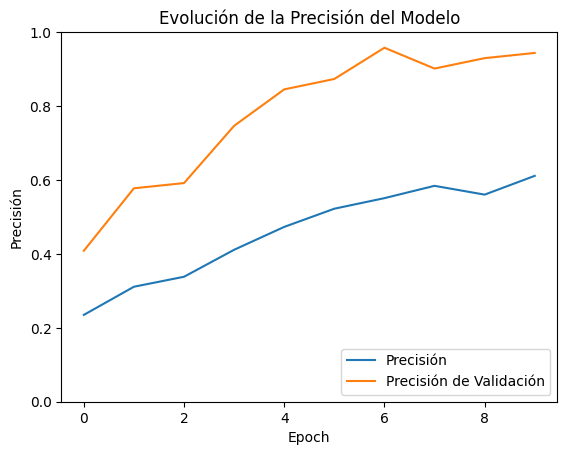

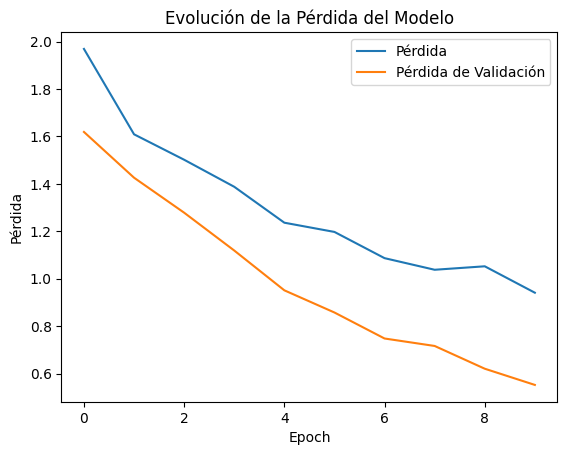

In [ ]:
plt.plot(history.history['accuracy'], label='Precisión')
plt.plot(history.history['val_accuracy'], label='Precisión de Validación')
plt.title('Evolución de la Precisión del Modelo')
plt.xlabel('Epoch')
plt.ylabel('Precisión')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'], label='Pérdida')
plt.plot(history.history['val_loss'], label='Pérdida de Validación')
plt.title('Evolución de la Pérdida del Modelo')
plt.xlabel('Epoch')
plt.ylabel('Pérdida')
plt.legend(loc='upper right')
plt.show()

In [ ]:
class_names = sorted(train.class_indices.items(), key=lambda pair:pair[1])
class_names = np.array([key.title() for key, value in class_names])
class_names

array(['Beetroot', 'Cauliflower', 'Orange', 'Pear', 'Pineapple',
       'Watermelon'], dtype='<U11')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
[[0.45923793 0.02396365 0.06214843 0.19891949 0.05286973 0.20286076]]
uint8


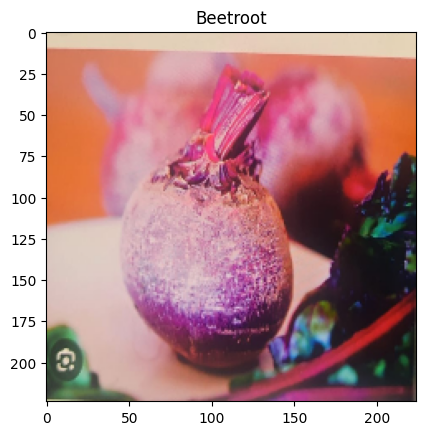

In [ ]:
import io
img=cv2.imread('/content/remolacha1.jpeg')
img2=cv2.resize(img,(224,224))
img_cvt=cv2.cvtColor(img2,cv2.COLOR_BGR2RGB)
img2=np.reshape(img2,[1,224,224,3])
img2=img2/255.0
prediction=model.predict(img2)
print(prediction)
plt.imshow(img_cvt)
print(img_cvt.dtype)
plt.title(class_names[np.argmax(prediction)])
plt.show()

In [ ]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
modelo_tflite = converter.convert()

In [ ]:
with open("/content/project_model.tflite", "wb") as f:
    f.write(modelo_tflite)

In [ ]:
! python --version